https://archive.ics.uci.edu/</br>
https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/gustavopierre/mushrooms/refs/heads/main/api/machinelearning/data/secondary_data.csv', sep=';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [19]:
df.shape

(61069, 21)

In [20]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

As variaveis numericas não têm valores nulos.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

Vamos transformar a variavel class em 1 e 0 e apagá-la em seguida.

In [22]:
# Manual encoding: 'e' (edible) -> 0, 'p' (poisonous) -> 1
df['class_encoded'] = df['class'].map({'e': 0, 'p': 1})

# Display the mapping applied
print("Mapping applied:")
print("e (edible): 0")
print("p (poisonous): 1")

# Display the head of the DataFrame with the new encoded column
display(df[['class', 'class_encoded']].head())

Mapping applied:
e (edible): 0
p (poisonous): 1


,class,class_encoded
0,p,1
1,p,1
2,p,1
3,p,1
4,p,1


In [23]:
# Drop the original 'class' column
df = df.drop('class', axis=1)

display(df.head())

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class_encoded
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,y,w,u,w,t,g,NaN,d,w,1
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,...,y,w,u,w,t,g,NaN,d,u,1
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,...,y,w,u,w,t,g,NaN,d,w,1
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,y,w,u,w,t,p,NaN,d,w,1
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,...,y,w,u,w,t,p,NaN,d,w,1


Verificar quantos valores únicos tem em cada variavel categorica

In [24]:
for col in df.select_dtypes(include='object').columns:
    print(f"Coluna '{col}':")
    print(df[col].unique())
    print("-" * 30)

Coluna 'cap-shape':
['x' 'f' 'p' 'b' 'c' 's' 'o']
------------------------------
Coluna 'cap-surface':
['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']
------------------------------
Coluna 'cap-color':
['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
------------------------------
Coluna 'does-bruise-or-bleed':
['f' 't']
------------------------------
Coluna 'gill-attachment':
['e' nan 'a' 'd' 's' 'x' 'p' 'f']
------------------------------
Coluna 'gill-spacing':
[nan 'c' 'd' 'f']
------------------------------
Coluna 'gill-color':
['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
------------------------------
Coluna 'stem-root':
['s' nan 'b' 'r' 'c' 'f']
------------------------------
Coluna 'stem-surface':
['y' nan 's' 'k' 'i' 'h' 't' 'g' 'f']
------------------------------
Coluna 'stem-color':
['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
------------------------------
Coluna 'veil-type':
['u' nan]
------------------------------
Coluna 'veil-color':
['w' 'y' nan 'n' 'e' 

Vamos preencher os valores nulos das variaveis categoricas em "unknown".

In [25]:
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna('unknown')

display(df.isnull().sum())

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
class_encoded           0
dtype: int64

Vamos aplicar o One-Hot Encoding nas variáveis categoricas.

In [26]:
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns)
display(df_encoded.head())

,cap-diameter,stem-height,stem-width,class_encoded,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,16.60,17.99,18.19,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,14.07,17.80,17.74,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,14.17,15.77,15.98,1,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,14.64,16.53,17.20,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [27]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Columns: 129 entries, cap-diameter to season_w
dtypes: bool(125), float64(3), int64(1)
memory usage: 9.1 MB


Separação em conjunto de treino e conjunto de teste com holdout

In [28]:
test_size = 0.20 # test set size
seed = 3 # random seed

# Separate features (X) and target (y)
X = df_encoded.drop('class_encoded', axis=1)
y = df_encoded['class_encoded']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout with stratification

# Cross-validation parameters and folds
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # stratified cross-validation

print("Train and test split performed successfully.")
print(f"Training set size (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Test set size (X_test, y_test): {X_test.shape}, {y_test.shape}")

Train and test split performed successfully.
Training set size (X_train, y_train): (48855, 128), (48855,)
Test set size (X_test, y_test): (12214, 128), (12214,)


In [29]:
X_train.head()

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
26176,11.70,8.86,24.89,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
21964,4.57,3.77,8.46,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
19762,2.46,3.39,6.14,False,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False
20756,4.54,4.24,7.09,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
18041,7.12,6.12,11.36,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


KNN: 0.999652 (0.000275)
CART: 0.999284 (0.000293)
CART: 0.999284 (0.000293)
NB: 0.633630 (0.004632)
NB: 0.633630 (0.004632)
SVM: 0.959615 (0.002575)
SVM: 0.959615 (0.002575)


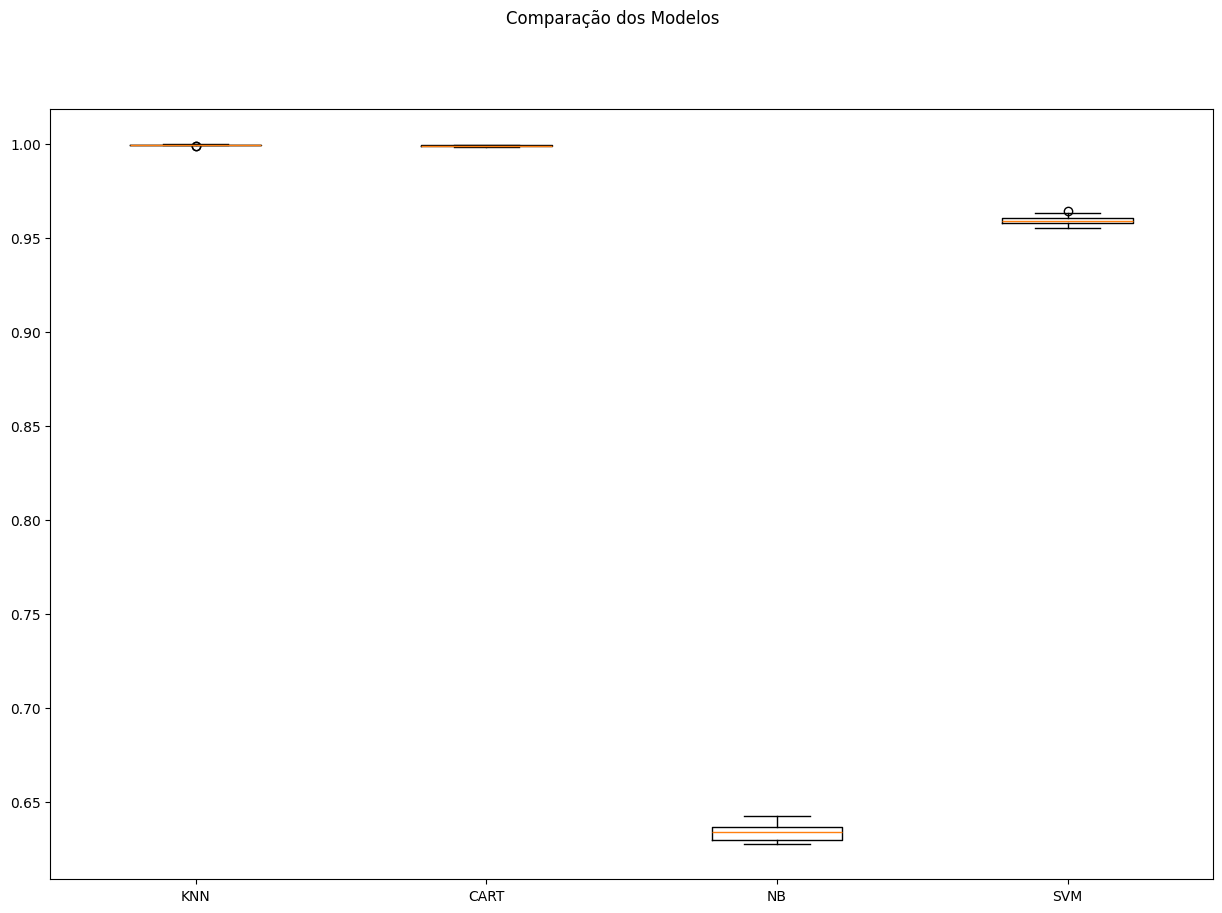

In [30]:
np.random.seed(3) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Criação e avaliação de modelos: dados padronizados e normalizados. Comentei o SVM porque esta levando muito mais tempo que os demais.

KNN-orig: 0.9996 (0.00017)
CART-orig: 0.9991 (0.00047)
NB-orig: 0.6370 (0.00546)
KNN-padr: 0.9999 (0.00013)
CART-padr: 0.9991 (0.00039)
NB-padr: 0.5899 (0.00365)
KNN-norm: 1.0000 (0.00000)
CART-norm: 0.9992 (0.00042)
NB-norm: 0.6060 (0.00589)


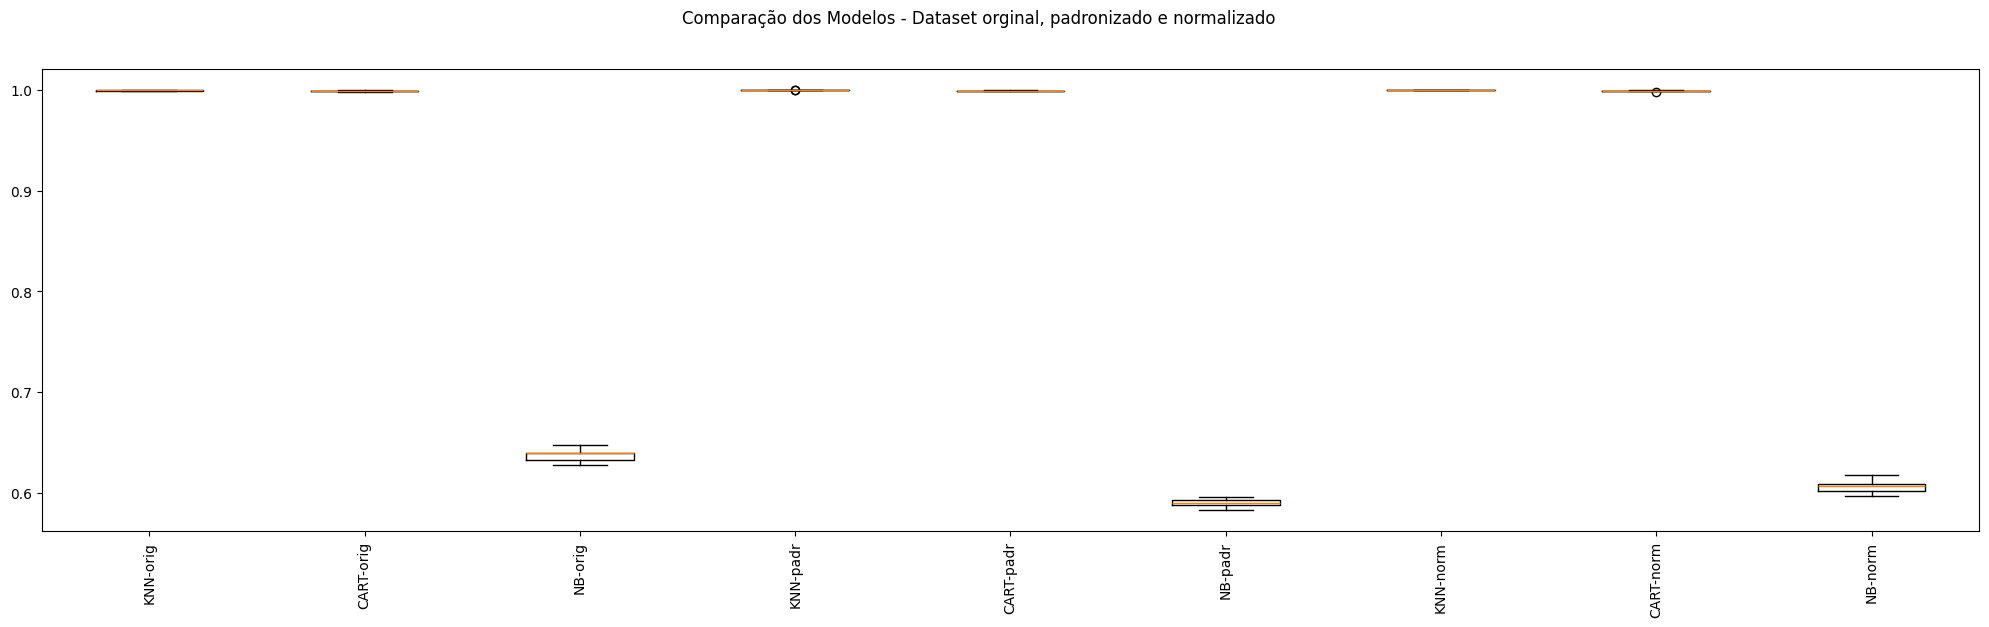

In [ ]:
np.random.seed(3) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.4f (%.5f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Otimização dos Hiperparametros

In [27]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.999980 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-padr - Melhor: 1.000000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 1.000000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}


Finalizando o modelo

In [30]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=1)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

1.0


In [31]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'manhattan'
,metric_params,None
,n_jobs,None


Criando a função que preprocessa o dataset

In [32]:
def preprocess_new_data(new_data_df_original, scaler, trained_columns):
    """
    Applies preprocessing steps to new data based on the training data steps.

    Args:
        new_data_df_original (pd.DataFrame): DataFrame with new data in original format.
        scaler (StandardScaler): Fitted StandardScaler object from training data.
        trained_columns (pd.Index): Columns of the training data (X) after preprocessing.

    Returns:
        np.ndarray: Preprocessed and scaled new data as a NumPy array.
    """
    # 1. Handle potential missing values (fill with 'unknown' for object type columns)
    processed_data = new_data_df_original.copy() # Work on a copy to avoid modifying original
    for col in processed_data.select_dtypes(include='object').columns:
         # Ensure the column exists in the training data's original columns before filling (optional but safer)
         if col in df.columns and df[col].dtype == 'object':
              processed_data[col] = processed_data[col].fillna('unknown')


    # 2. Apply One-Hot Encoding
    processed_data_encoded = pd.get_dummies(processed_data, columns=processed_data.select_dtypes(include='object').columns)

    # 3. Reindex to ensure all columns present in the training data are present
    # Fill missing columns with 0
    processed_data_encoded = processed_data_encoded.reindex(columns=trained_columns, fill_value=0)

    # 4. Apply the same scaler fitted on the training data
    rescaled_data = scaler.transform(processed_data_encoded)

    return rescaled_data

Simulando a aplicação do modelo em dados não vistos

In [33]:
# Example of how to use the function with the simulated data from the previous attempt
# (Assuming new_data_df_original, scaler, and X.columns are available from previous cells)

# Simulate a new data point (one row) with original feature columns
# Replace these values with the actual characteristics of a new mushroom
sample_new_mushroom_data = {
    'cap-diameter': [12.0],
    'cap-shape': ['x'],
    'cap-surface': ['g'],
    'cap-color': ['n'],
    'does-bruise-or-bleed': ['f'],
    'gill-attachment': ['e'],
    'gill-spacing': ['c'], # Example with a value present in original data
    'gill-color': ['w'],
    'stem-height': [10.0],
    'stem-width': [15.0],
    'stem-root': ['s'],
    'stem-surface': ['y'],
    'stem-color': ['w'],
    'veil-type': ['u'],
    'veil-color': ['w'],
    'has-ring': ['t'],
    'ring-type': ['g'],
    'spore-print-color': ['w'],
    'habitat': ['d'],
    'season': ['w']
}

sample_new_data_df_original = pd.DataFrame(sample_new_mushroom_data)

# Get the columns from your training data (X)
# Assuming X was created in cell '12cbef02' or '3sxMDivIdO2J'
# Assuming scaler was fitted in cell 'ojVifDDep7GQ'

# Preprocess the sample new data
preprocessed_sample_data = preprocess_new_data(sample_new_data_df_original, scaler, X.columns)

# Make a prediction using the trained model
# Assuming 'model' is available from cell 'ojVifDDep7GQ'
sample_prediction = model.predict(preprocessed_sample_data)

# Map back to original label manually (0 -> 'e', 1 -> 'p')
sample_predicted_class_label = ['e' if pred == 0 else 'p' for pred in sample_prediction]


print("Sample new data (original format):")
display(sample_new_data_df_original)
print("\nSample new data (preprocessed and scaled):")
print(preprocessed_sample_data)
print("\nPrediction for sample new data (0: edible, 1: poisonous):")
print(sample_prediction)
print("\nPredicted class label for sample new data:")
print(sample_predicted_class_label)

Sample new data (original format):


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,12.0,x,g,n,f,e,c,w,10.0,15.0,s,y,w,u,w,t,g,w,d,w



Sample new data (preprocessed and scaled):
[[ 1.00025522  1.01438357  0.28404007 -0.32066522 -0.17501669 -0.53029485
  -0.24507154 -0.21078966 -0.36455517  1.12576962 -0.2797369  -0.21019579
   3.45360566 -0.29777677 -0.19445267 -0.19796294 -0.15384615 -0.37723911
  -0.39371685 -0.5484085  -0.19102559 -0.34038788 -0.1433707  -0.2659836
  -0.27932835 -0.14625846 -0.11723818  1.23354643 -0.2523469  -0.16937076
  -0.17337007 -0.16967743 -0.37887991 -0.40329054  0.45802861 -0.45802861
  -0.5123599  -0.44902704  3.13249102 -0.2476887  -0.33011265 -0.31923475
  -0.43943537 -0.37169597  1.21302456 -0.38170062 -0.2476887  -0.83431315
  -0.12597453 -0.13328833 -0.2476887  -0.26890105 -0.20115691 -0.43308006
  -0.22364524 -0.32956333 -0.15311962 -0.13052562  1.51567944 -0.43043754
  -0.23426064 -0.10814761 -0.13284223 -0.15384615  4.26874949 -2.32538328
  -0.13284223 -0.17251639 -0.09401068 -0.27850997 -0.16302389 -0.33084421
  -0.21273129 -1.28900677  3.37077821 -0.05330018 -0.18637215 -0.1328

In [ ]:
# Pipeline completo com One-Hot Encoding, StandardScaler e modelo
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Primeiro, vamos criar o pipeline usando os dados originais (antes do One-Hot Encoding)
# Precisamos voltar ao DataFrame original

# Recarregar dados originais
df_original = pd.read_csv('https://raw.githubusercontent.com/gustavopierre/mushrooms/refs/heads/main/api/machinelearning/data/secondary_data.csv', sep=';')

# Aplicar encoding da classe
df_original['class_encoded'] = df_original['class'].map({'e': 0, 'p': 1})
df_original = df_original.drop('class', axis=1)

# Preencher valores nulos
for col in df_original.select_dtypes(include='object').columns:
    if df_original[col].isnull().any():
        df_original[col] = df_original[col].fillna('unknown')

# Separar features e target
X_original = df_original.drop('class_encoded', axis=1)
y_original = df_original['class_encoded']

# Identificar colunas categóricas e numéricas
categorical_features = X_original.select_dtypes(include='object').columns.tolist()
numerical_features = X_original.select_dtypes(exclude='object').columns.tolist()

print("Colunas categóricas:", categorical_features)
print("Colunas numéricas:", numerical_features)

# Criar o preprocessador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# Criar o pipeline completo
complete_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(metric='manhattan', n_neighbors=1))
])

print("\nPipeline criado com sucesso!")
print("Componentes do pipeline:")
print("1. Preprocessador:")
print("   - StandardScaler para variáveis numéricas")
print("   - OneHotEncoder para variáveis categóricas")
print("2. Classificador KNN")

Gerando o pickle do modelo